# IGM density distribution

Following [Bi+2002](https://iopscience.iop.org/article/10.1086/378793/pdf)

In [4]:
import numpy as np
import matplotlib.pylab as plt
from astropy.cosmology import Planck15
import astropy.units as u
import astropy.constants as const

In [25]:
from hmf import MassFunction

In [49]:
mf = MassFunction(z = 6.6, Mmin=2, Mmax=12, dlog10m=0.1,              # Redshift of 1.0
                  cosmo_params={"Om0":0.3}, # Matter density of 0.3
                  hmf_model="PS")           # Press-Schechter fitting function

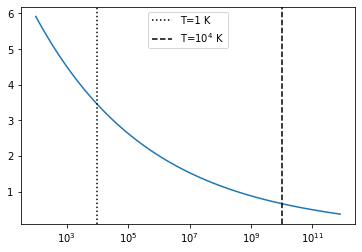

In [53]:
plt.semilogx(mf.m, mf.sigma)

plt.axvline(1e4, ls='dotted', c='k', label='T=1 K')
plt.axvline(1e10, ls='dashed', c='k', label='T=$10^4$ K')
plt.xlabel('Mass [Msun]')
plt.ylabel('$\sigma$')

plt.legend()

In [18]:
def p_Delta(Delta, sigma0=1.):
    return np.exp(-0.5*((np.log(Delta) + 0.5*sigma0**2.)/sigma0)**2.) \
            / np.sqrt(2*np.pi) / Delta / sigma0

def x_Jeans(z, T=1*u.K, mu=1, gamma=5./3):
    return (np.sqrt(2*gamma*const.k_B*T/(3.*mu*const.m_p*Planck15.Om0*(1+z)))/Planck15.H0).to(u.Mpc)

def M_Jeans(z, T=1*u.K, mu=1, gamma=5./3):
    return (4/3 * np.pi * Planck15.critical_density0 * (2*np.pi*x_Jeans(z, T, mu, gamma)/2)**3.).to(u.Msun)


In [45]:
print(f'{M_Jeans(z=6.6):.1e}')
print(f'{M_Jeans(z=6.6, T=1e4*u.K):.1e}')

1.3e+04 solMass
1.3e+10 solMass


1.000219952665097
0.9644491051658503


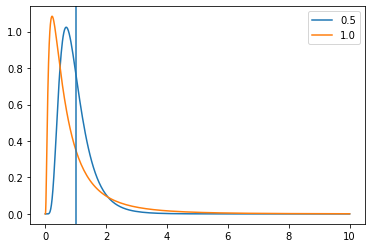

In [81]:
Delta = np.logspace(-15,1,1000)

for sigma0 in [0.5, 1.,]:#, 4.]:
    plt.plot(Delta, p_Delta(Delta, sigma0=sigma0), label=sigma0)
    mean = np.trapz(Delta*p_Delta(Delta, sigma0=sigma0), Delta)
    print(mean)
plt.legend()
plt.axvline(1.)

In [82]:
print(np.log(1))

0.0


# Density inside bubble

- Barkana+04: $\Delta \propto r^{-1} /, r<10R_{Vir}$

What is Rvir at z=7 for M~10^9Msun galaxy?

https://ned.ipac.caltech.edu/level5/March01/Barcana/Bar2.html
![rvir](https://ned.ipac.caltech.edu/level5/March01/Barcana/Equations/eq24.gif)

In [9]:
def R_vir(Mh, z, Delta_crit):
    return 0.784 * (Mh/1e8 * Planck15.h)**(1/3) * (Planck15.Om0/Planck15.Om(z) * Delta_crit/18/(np.pi**2.))**(-1./3) * (10./(1+z)) / Planck15.h * u.kpc

In [10]:
R_vir(Mh=1e8, z=7, Delta_crit=200)

<Quantity 1.80289835 kpc>